##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Loading and Prepocessing Data

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum() #age and cabin has a lot of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#removing the cabin as it is not useful
data = data.drop('Cabin', axis=1)

In [7]:
#replacing null with the mean
data['Age'].fillna(data['Age'].mean(), inplace=True)  #inpace true wll change in dataset

In [8]:
#fixing embarked with the mode value
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
print(data['Embarked'].mode()[0])

S


In [10]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [11]:
#checking again for null values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##Data Analysis

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#people survived
data['Survived'].value_counts()
#0 and 1 is survived and unsurvived

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

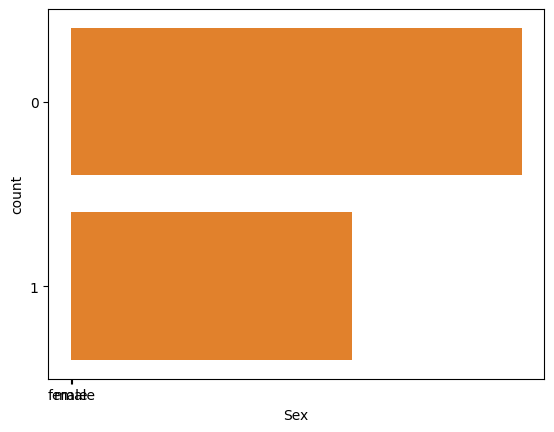

In [15]:
sns.countplot(x='Sex', data=data)  # Count occurrences of 'Sex'
# OR
sns.countplot(y='Survived', data=data)  # Count occurrences of 'Survived'

<Axes: xlabel='Sex', ylabel='count'>

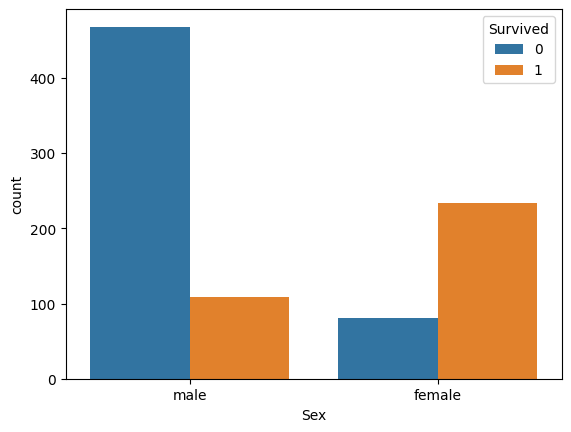

In [16]:
sns.countplot(x='Sex',hue='Survived',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

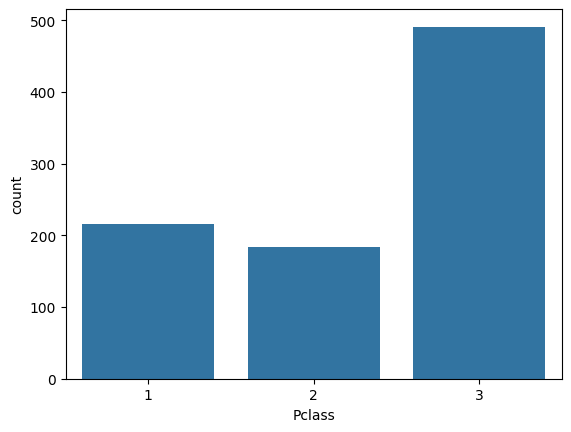

In [17]:
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

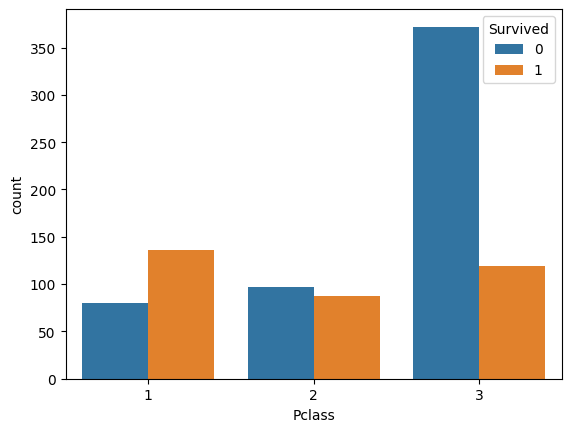

In [18]:
sns.countplot(x='Pclass',hue='Survived',data=data)

##Encoding Categorical data

In [19]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [21]:
#converting to the numeric

In [22]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [23]:
X = data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)
Y = data['Survived']

In [24]:
print(X)  #input

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [25]:
print(Y) #target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


##spliting training and testing data

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [27]:
print(X.shape,X_test.shape,X_train.shape)  #having equal 7 columns

(891, 7) (268, 7) (623, 7)


##Logistical Regression

In [28]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Model Evaluation

In [29]:
X_train_prediction = model.predict(X_train)

In [30]:
X_train_prediction #prediction of trained data

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [31]:
train_accuracy = accuracy_score(Y_train,X_train_prediction)
train_accuracy  #approx 80

0.8041733547351525

In [32]:
X_test_prediction = model.predict(X_test) #test data
X_test_prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [33]:
#accuracy of test data
test_accuracy = accuracy_score(Y_test,X_test_prediction)
test_accuracy  #80.5

0.8059701492537313

##working model

In [34]:
import joblib
joblib.dump(model,'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [35]:
!pip install pyngrok


import pyngrok
import subprocess
import os
from pyngrok import ngrok
#setting up authorizatoin

ngrok.set_auth_token("2W0AAKpFEev6QfsJUJ6M2tyMkUa_7Pa1DerHAjsswLyMBwEsk")

#running the flask app

os.system("nohup python -m flask run --no-reload &")

#openeing the ngrok tunnel to the flask app using http protocol
proc = subprocess.Popen(['ngrok', 'http', '5000'])

#public_url
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://9dd7-34-75-153-159.ngrok-free.app" -> "http://localhost:5000"


In [44]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        :root {
            --background-color-light: #f4f4f9; /* Light background color */
            --text-color-light: #333; /* Dark text color */
            --form-background-light: rgba(255, 255, 255, 0.95); /* Light background for form */
            --input-background-light: rgba(255, 255, 255, 0.1); /* Light background for inputs */
            --button-background-light: #2c3e50; /* Dark blue button */
            --button-color-light: #fff; /* White text */
            --notification-background-light: #333; /* Dark background for notification */
            --notification-color-light: #fff; /* White text */
            --border-color-light: #ddd; /* Light border color */

            --background-color-dark: #222; /* Dark background color */
            --text-color-dark: #ddd; /* Light text color */
            --form-background-dark: rgba(30, 30, 30, 0.95); /* Dark background for form */
            --input-background-dark: #444; /* Dark background for inputs */
            --button-background-dark: #2c3e50; /* Dark blue button */
            --button-color-dark: #fff; /* White text */
            --notification-background-dark: #333; /* Dark background for notification */
            --notification-color-dark: #fff; /* White text */
            --border-color-dark: #555; /* Dark border color */

            --background-color-custom: #e8f0ff; /* Custom background color */
        }

        body {
            background-color: var(--background-color-light);
            color: var(--text-color-light);
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
            margin: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            position: relative;
            transition: background-color 0.3s, color 0.3s;
        }
        h1 {
            margin-bottom: 20px;
        }
        #predictionForm {
            width: 90%;
            max-width: 400px;
            background-color: var(--form-background-light);
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            text-align: left;
            margin-bottom: 20px;
            transition: background-color 0.3s;
        }
        #predictionForm label {
            display: block;
            margin-bottom: 8px;
            color: var(--text-color-light);
        }
        #predictionForm input[type="text"] {
            width: calc(100% - 20px);
            padding: 10px;
            margin-bottom: 15px;
            border: none;
            border-radius: 6px;
            background-color: var(--input-background-light);
            color: var(--text-color-light);
            outline: none;
            transition: border-color 0.3s, background-color 0.3s;
        }
        #predictionForm input[type="text"]:focus {
            border: 1px solid var(--border-color-light);
        }
        #predictionForm button {
            width: 100%;
            padding: 12px;
            background-color: var(--button-background-light);
            color: var(--button-color-light);
            border: none;
            border-radius: 6px;
            cursor: pointer;
            transition: background-color 0.3s;
        }
        #predictionForm button:hover {
            background-color: #1a252f; /* Darker shade on hover */
        }
        .notification {
            position: fixed;
            top: 20px;
            left: 50%;
            transform: translateX(-50%);
            background-color: var(--notification-background-light);
            color: var(--notification-color-light);
            padding: 10px 20px;
            border-radius: 8px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            z-index: 1000;
            display: none;
            transition: background-color 0.3s, color 0.3s;
        }

        @media (prefers-color-scheme: dark) {
            body {
                background-color: var(--background-color-dark);
                color: var(--text-color-dark);
            }
            #predictionForm {
                background-color: var(--form-background-dark);
            }
            #predictionForm label {
                color: var(--text-color-dark);
            }
            #predictionForm input[type="text"] {
                background-color: var(--input-background-dark);
                color: var(--text-color-dark);
            }
            #predictionForm input[type="text"]:focus {
                border: 1px solid var(--border-color-dark);
            }
            #predictionForm button {
                background-color: var(--button-background-dark);
                color: var(--button-color-dark);
            }
            .notification {
                background-color: var(--notification-background-dark);
                color: var(--notification-color-dark);
            }
        }
    </style>
</head>
<body>
    <h1>Titanic Survival Prediction</h1>
    <form id="predictionForm">
        <label for="pclass">Pclass:</label>
        <input type="text" id="pclass" name="pclass" required><br><br>

        <label for="sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="sex" name="sex" required><br><br>

        <label for="age">Age:</label>
        <input type="text" id="age" name="age" required><br><br>

        <label for="sibsp">SibSp:</label>
        <input type="text" id="sibsp" name="sibsp" required><br><br>

        <label for="parch">Parch:</label>
        <input type="text" id="parch" name="parch" required><br><br>

        <label for="fare">Fare:</label>
        <input type="text" id="fare" name="fare" required><br><br>

        <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
        <input type="text" id="embarked" name="embarked" required><br><br>

        <button type="button" onclick="predictSurvival()">Predict</button>
    </form>

    <div id="notification" class="notification"></div>

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm"));

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    var notification = document.getElementById("notification");
                    notification.style.display = "block";
                    notification.textContent = "Survival Prediction: " + response.prediction;

                    // Hide notification after 5 seconds
                    setTimeout(function() {
                        notification.style.display = "none";
                    }, 5000);
                }
            };
            xhr.send(data);
        }

        // Detect user's color scheme preference
        var prefersDarkMode = window.matchMedia && window.matchMedia('(prefers-color-scheme: dark)').matches;
        if (prefersDarkMode) {
            document.documentElement.setAttribute('data-theme', 'dark');
        }
    </script>
</body>
</html>




    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://d253-34-75-153-159.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 20:22:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 20:22:19] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 20:22:34] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 20:22:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 20:22:54] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2024 20:22:55] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fit